In [131]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns                                   # For pretty plot
from datetime import datetime, timedelta

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

from itertools import product
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
full_df = pd.read_csv('2008-2016.txt',header=[0,1],sep='\t',low_memory=False)
full_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4   ---              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4   ---              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5   ---              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3   ---              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2   ---              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV        Hi    Heat  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose  UV    D-D    
0                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.019   
1                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.019   
2                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.018   
3                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.020   
4                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.021   

    Cool   In   In   In               In Air Unnamed: 33_level_0 Wind      \
    D-D   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx    
0  0.000  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   
1  0.000  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   
2  0.000  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1   
3  0.000  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1   
4  0.000  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1   

    ISS  Arc.  
  Recept Int.  
0   76.8   10  
1   41.7   10  
2  100.0   10  
3  100.0   10  
4  100.0   10

In [3]:
full_df.replace("---",-1,inplace=True)
full_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4    -1              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4    -1              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5    -1              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3    -1              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2    -1              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV       Hi    Heat   Cool  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose UV    D-D    D-D    
0                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
1                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
2                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.018  0.000   
3                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.020  0.000   
4                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.021  0.000   

    In   In   In               In Air Unnamed: 33_level_0 Wind       ISS  Arc.  
   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx  Recept Int.  
0  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   76.8   10  
1  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   41.7   10  
2  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1  100.0   10  
3  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1  100.0   10  
4  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1  100.0   10

In [4]:
full_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4    -1              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4    -1              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5    -1              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3    -1              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2    -1              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV       Hi    Heat   Cool  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose UV    D-D    D-D    
0                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
1                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
2                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.018  0.000   
3                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.020  0.000   
4                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.021  0.000   

    In   In   In               In Air Unnamed: 33_level_0 Wind       ISS  Arc.  
   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx  Recept Int.  
0  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   76.8   10  
1  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   41.7   10  
2  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1  100.0   10  
3  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1  100.0   10  
4  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1  100.0   10

In [5]:
useful_indx = full_df["Temp"]["Out"] != -1

In [6]:
usefuldata = full_df.loc[useful_indx]

In [7]:
usefuldata.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4    -1              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4    -1              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5    -1              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3    -1              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2    -1              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV       Hi    Heat   Cool  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose UV    D-D    D-D    
0                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
1                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
2                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.018  0.000   
3                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.020  0.000   
4                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.021  0.000   

    In   In   In               In Air Unnamed: 33_level_0 Wind       ISS  Arc.  
   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx  Recept Int.  
0  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   76.8   10  
1  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   41.7   10  
2  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1  100.0   10  
3  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1  100.0   10  
4  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1  100.0   10

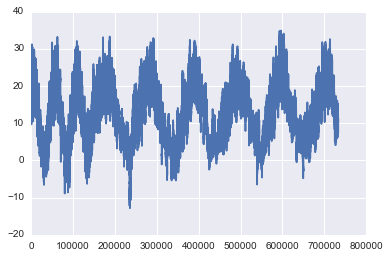

In [9]:
plt.plot(usefuldata["Temp"]["Out"].apply(float))

In [14]:
date_df = usefuldata["Unnamed: 0_level_0"]
time_df = usefuldata["Unnamed: 1_level_0"]
temp_df = usefuldata["Temp"]["Out"].astype(float)
wind_df = usefuldata["Wind"]["Speed"].astype(float)

In [113]:
tempWind_df = pd.concat([date_df,time_df,temp_df,wind_df],axis=1)
tempWind_df = tempWind_df.rename(columns = {"Out":"Temp", "Speed":"Wind"})

In [114]:
tempWind_df.head()

,Date,Time,Temp,Wind
0,13/06/08,15:30,15.7,1.6
1,13/06/08,15:40,15.6,6.4
2,13/06/08,15:50,15.7,3.2
3,13/06/08,16:00,15.4,4.8
4,13/06/08,16:10,15.3,4.8


In [115]:
tempWind_df = tempWind_df.set_index("Date")

In [116]:
usefulData = tempWind_df.ix['01/01/16':'10/07/16']

In [117]:
usefulData.tail()

,Time,Temp,Wind
Date,,,
10/07/16,23:35,27.0,0.0
10/07/16,23:40,26.9,1.6
10/07/16,23:45,26.9,0.0
10/07/16,23:50,26.9,1.6
10/07/16,23:55,26.9,0.0


In [118]:
usefulData = usefulData.reset_index()

In [119]:
 dateTime = pd.to_datetime(usefulData['Date'] + ' ' + usefulData['Time'], dayfirst=True)

In [120]:
usefulData['dateTime'] = dateTime

In [121]:
usefulData.tail()

,Date,Time,Temp,Wind,dateTime
55162,10/07/16,23:35,27.0,0.0,2016-07-10 23:35:00
55163,10/07/16,23:40,26.9,1.6,2016-07-10 23:40:00
55164,10/07/16,23:45,26.9,0.0,2016-07-10 23:45:00
55165,10/07/16,23:50,26.9,1.6,2016-07-10 23:50:00
55166,10/07/16,23:55,26.9,0.0,2016-07-10 23:55:00


In [122]:
usefulData = usefulData.set_index(dateTime)

In [123]:
usefulData = usefulData.drop(['Date', 'Time', 'dateTime'], axis=1)

In [124]:
usefulData.tail()

,Temp,Wind
2016-07-10 23:35:00,27.0,0.0
2016-07-10 23:40:00,26.9,1.6
2016-07-10 23:45:00,26.9,0.0
2016-07-10 23:50:00,26.9,1.6
2016-07-10 23:55:00,26.9,0.0


In [125]:
usefulData1Min = usefulData.resample('1Min')

In [126]:
usefulData1Min.tail(20)

/Users/mohiuddi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


,Temp,Wind
2016-07-10 23:36:00,NaN,NaN
2016-07-10 23:37:00,NaN,NaN
2016-07-10 23:38:00,NaN,NaN
2016-07-10 23:39:00,NaN,NaN
2016-07-10 23:40:00,26.9,1.6
2016-07-10 23:41:00,NaN,NaN
2016-07-10 23:42:00,NaN,NaN
2016-07-10 23:43:00,NaN,NaN
2016-07-10 23:44:00,NaN,NaN
2016-07-10 23:45:00,26.9,0.0


In [127]:
usefulData1Min = usefulData1Min.interpolate()

In [130]:
usefulData1Min.head(10)

,Temp,Wind
2016-01-01 00:00:00,7.10,0.0
2016-01-01 00:01:00,7.14,0.0
2016-01-01 00:02:00,7.18,0.0
2016-01-01 00:03:00,7.22,0.0
2016-01-01 00:04:00,7.26,0.0
2016-01-01 00:05:00,7.30,0.0
2016-01-01 00:06:00,7.30,0.0
2016-01-01 00:07:00,7.30,0.0
2016-01-01 00:08:00,7.30,0.0
2016-01-01 00:09:00,7.30,0.0


In [132]:
final_df = usefulData1Min.loc['2016-01-01 01:00:00':'2016-07-09 20:59:00']

In [134]:
final_df.head()

,Temp,Wind
2016-01-01 01:00:00,7.30,0.0
2016-01-01 01:01:00,7.32,0.0
2016-01-01 01:02:00,7.34,0.0
2016-01-01 01:03:00,7.36,0.0
2016-01-01 01:04:00,7.38,0.0


In [135]:
final_df.tail()

,Temp,Wind
2016-07-09 20:55:00,26.80,6.40
2016-07-09 20:56:00,26.78,5.76
2016-07-09 20:57:00,26.76,5.12
2016-07-09 20:58:00,26.74,4.48
2016-07-09 20:59:00,26.72,3.84


In [137]:
pickle.dump(final_df, open("ELL_temp_wind_df.p","wb"))